In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Diabetes Binary Classification Dataset</h2>

Input Features:
'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age' <br>

Target Feature: 
'diabetes_class'<br>

Objective: Predict diabetes_class for given input features<br>

<h4>Data Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes </h4>

In [2]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [3]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [22]:
df.shape

(768, 9)

In [23]:
df= df[df['glucose_concentration'] != 0]
df.shape

(763, 9)

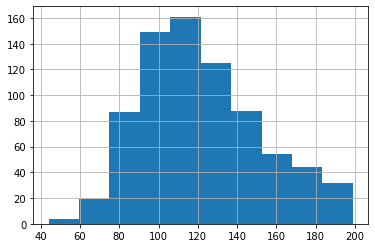

In [24]:
df['glucose_concentration'].hist()
plt.show()

In [27]:
df['diabetes_class'].value_counts()

0    497
1    266
Name: diabetes_class, dtype: int64

In [28]:
# Separate diabetic and normal samples
diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

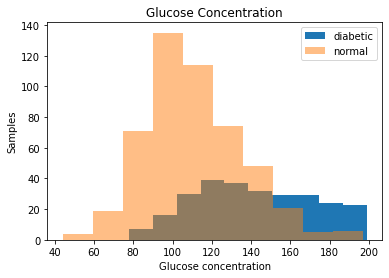

In [29]:
# Glucose concentration histogram
plt.hist(df[diabetic].glucose_concentration,label='diabetic')
plt.hist(df[normal].glucose_concentration,alpha=0.5,label='normal')
plt.title('Glucose Concentration')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

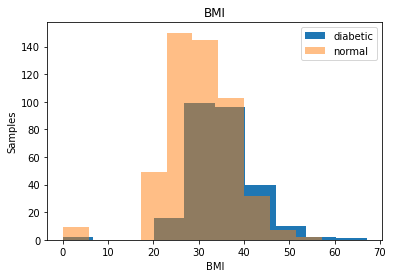

In [30]:
# BMI histogram
plt.hist(df[diabetic].bmi,label='diabetic')
plt.hist(df[normal].bmi,alpha=0.5,label='normal')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

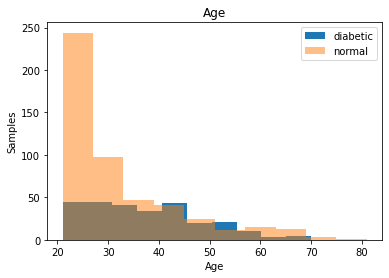

In [31]:
# Age
plt.hist(df[diabetic].age,label='diabetic')
plt.hist(df[normal].age,alpha=0.5,label='normal')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

## Training and Validation Set
### Target Variable as first column followed by input features:
'diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age'
### Training, Validation files do not have a column header

In [32]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

IndexError: positional indexers are out-of-bounds

In [ ]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [ ]:
rows, train, test

(768, 537, 231)

In [ ]:
# Write Training Set
df[:train].to_csv('diabetes_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [ ]:
# Write Validation Set
df[train:].to_csv('diabetes_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [ ]:
# Write Column List
with open('diabetes_train_column_list.txt','w') as f:
    f.write(','.join(columns))